In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [3]:
def anualiza_serie(ipca_gen):
    ipca_gen = (ipca_gen/100 + 1 )
    ipca_gen = np.power((ipca_gen),12)
    ipca_gen = (ipca_gen -1 ) * 100
    return ipca_gen

In [4]:
def corta_data(data, ipca_gen):
    ipca_gen = ipca_gen[ipca_gen.index >= data]
    return ipca_gen

In [29]:
def grafico(nome, ipca_gen):
    ipca_gen.plot(xlabel = "Data", ylabel = "Variação anualizada %", title = nome)

In [5]:
ipca = consulta_bc(433)
ipca_ms = consulta_bc(11427)
ipca_ma = consulta_bc(16121)
ipca_ex0 = consulta_bc(27838)
ipca_ex1 = consulta_bc(27839)
ipca_dp = consulta_bc(11426)
ipca_ex2 = consulta_bc(4466)
ipca_ex3 = consulta_bc(16122)

In [32]:
data_inicio = '2006-01-01'

In [7]:
ipca_d = corta_data(data_inicio, ipca)
ipca_ms_d = corta_data(data_inicio, ipca_ms)
ipca_ma_d = corta_data(data_inicio, ipca_ma)
ipca_ex0_d = corta_data(data_inicio, ipca_ex0)
ipca_ex1_d = corta_data(data_inicio, ipca_ex1)
ipca_dp_d = corta_data(data_inicio, ipca_dp)
ipca_ex2_d = corta_data(data_inicio, ipca_ex2)
ipca_ex3_d = corta_data(data_inicio, ipca_ex3)

In [8]:
ipca_d = anualiza_serie(ipca_d)
ipca_ms_d = anualiza_serie(ipca_ms_d)
ipca_ma_d = anualiza_serie(ipca_ma_d)
ipca_ex0_d = anualiza_serie(ipca_ex0_d)
ipca_ex1_d = anualiza_serie(ipca_ex1_d)
ipca_dp_d = anualiza_serie(ipca_dp_d)
ipca_ex2_d = anualiza_serie(ipca_ex2_d)
ipca_ex3_d = anualiza_serie(ipca_ex3_d)

<AxesSubplot:title={'center':'IPCA'}, xlabel='Data', ylabel='Variação anualizada % '>

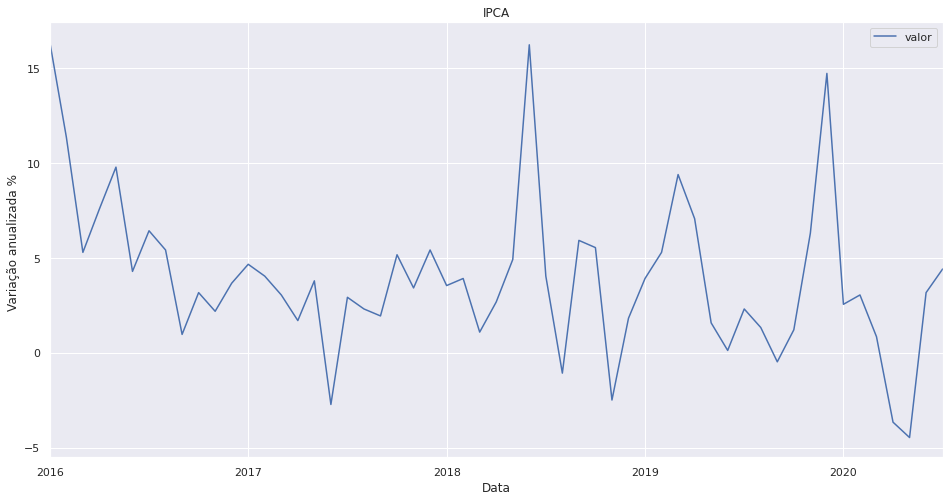

In [26]:
ipca_d.plot(xlabel = "Data", ylabel = "Variação anualizada % ", title = "IPCA")

In [16]:
type(ipca_d)

pandas.core.frame.DataFrame

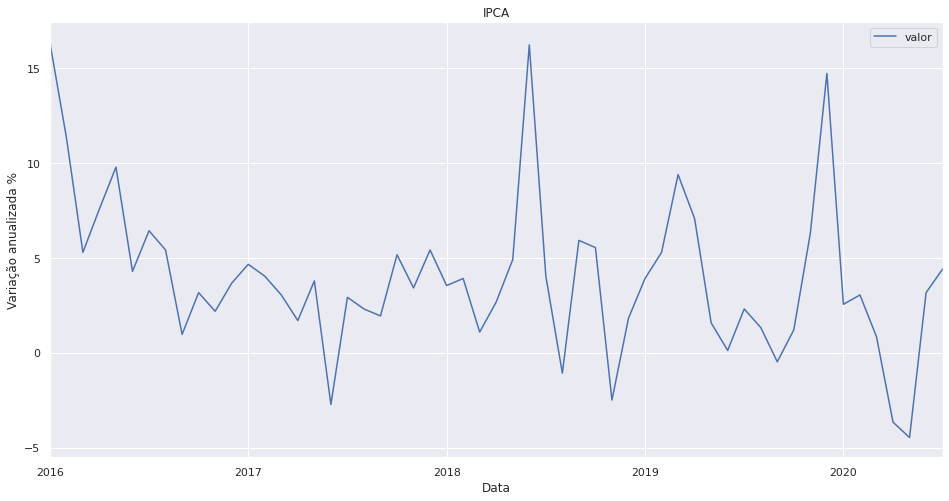

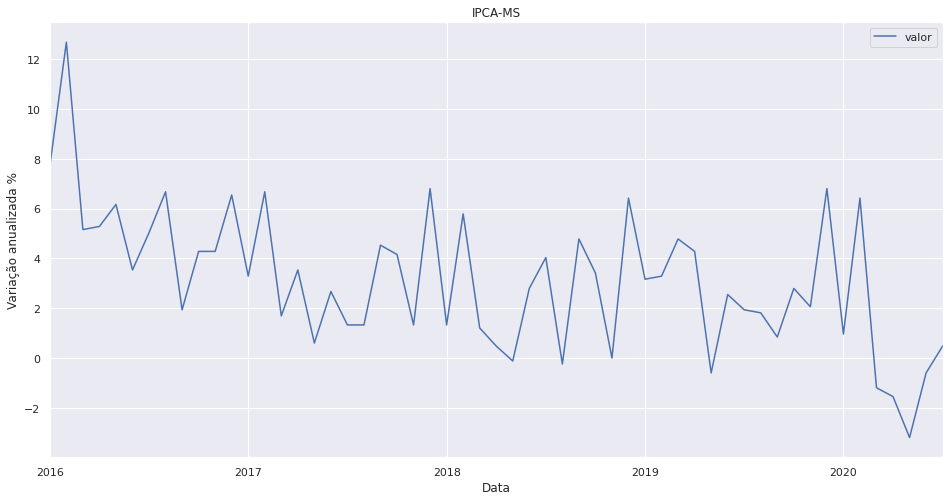

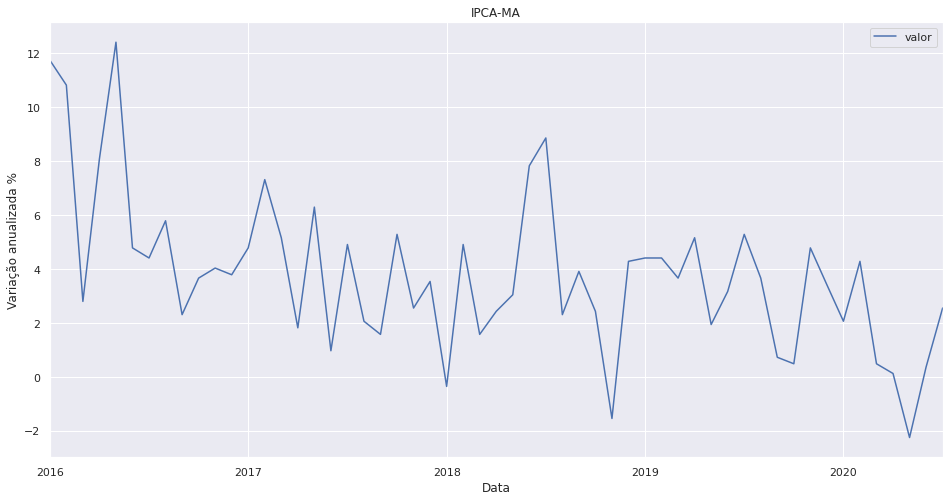

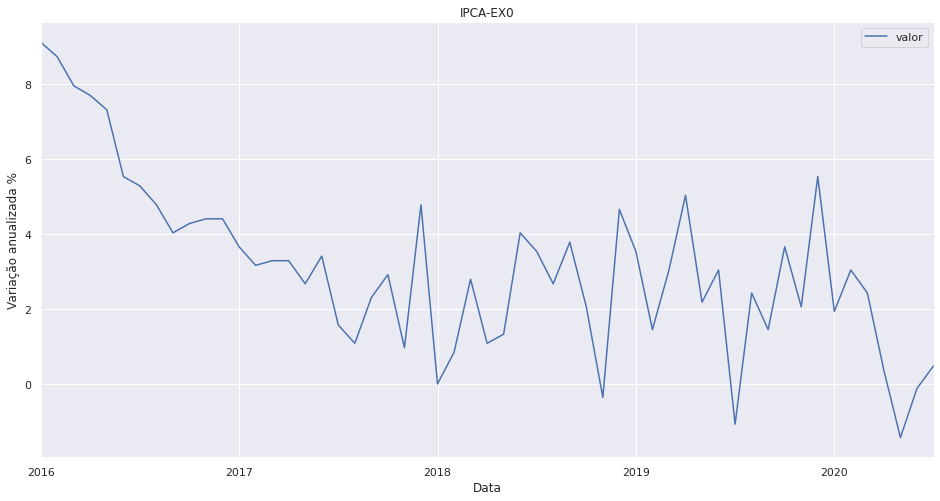

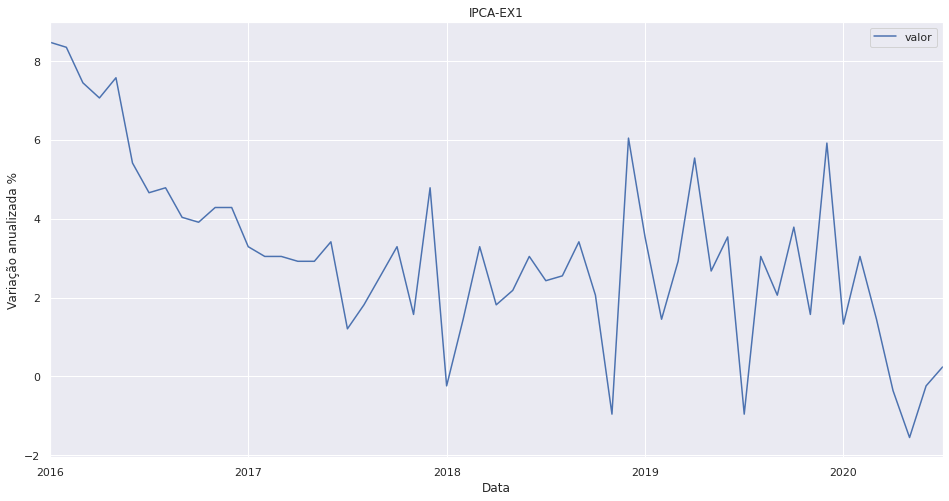

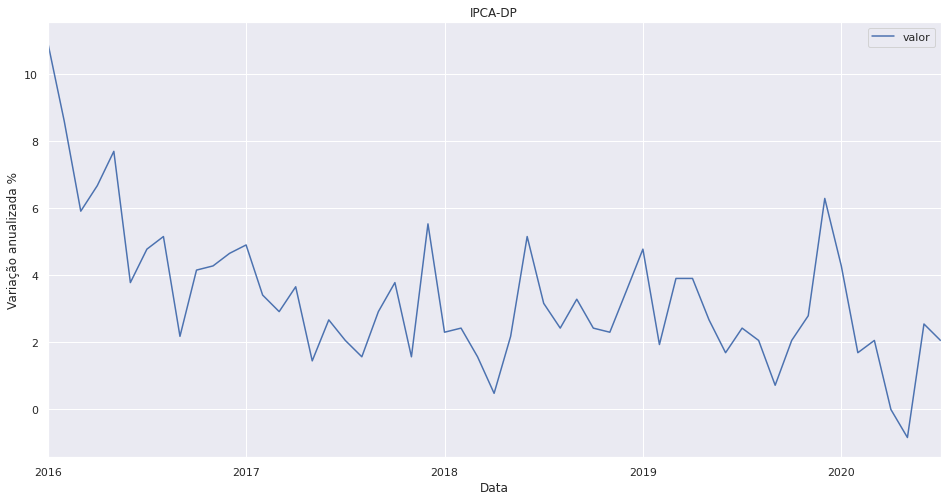

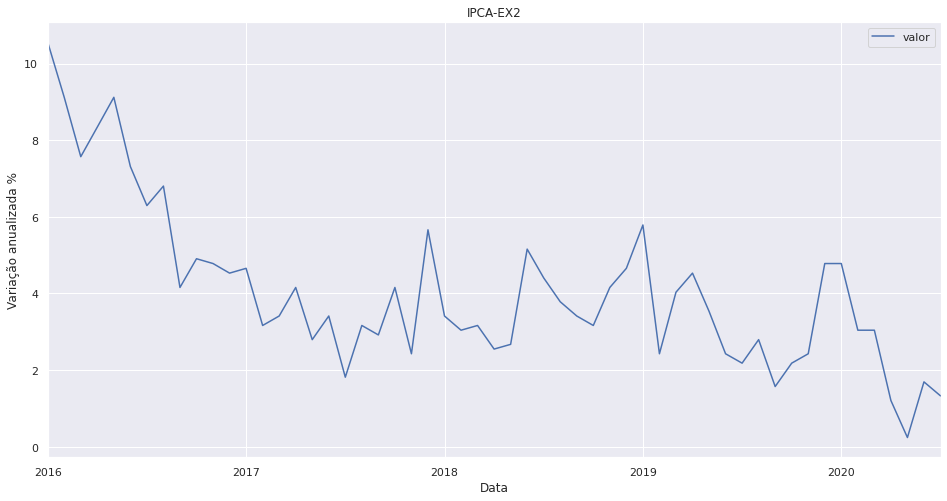

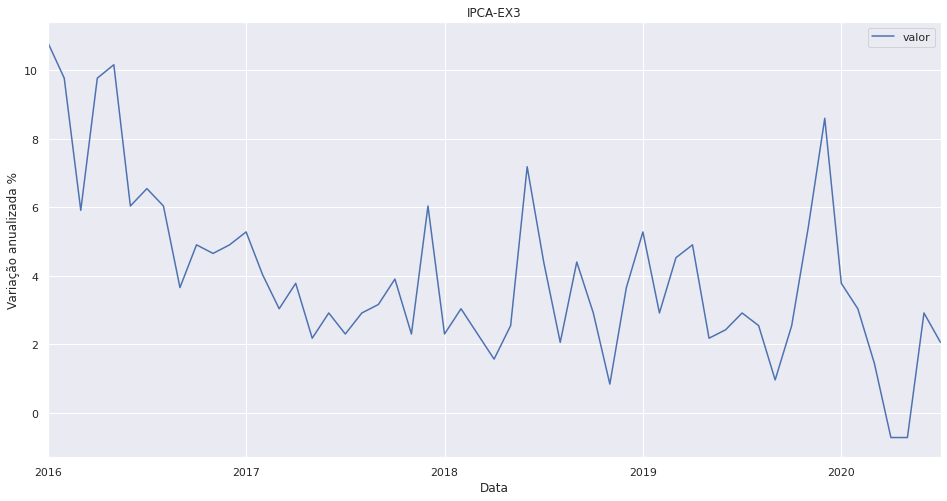

In [31]:
grafico("IPCA",ipca_d)
grafico("IPCA-MS",ipca_ms_d)
grafico("IPCA-MA",ipca_ma_d)
grafico("IPCA-EX0",ipca_ex0_d)
grafico("IPCA-EX1",ipca_ex1_d)
grafico("IPCA-DP",ipca_dp_d)
grafico("IPCA-EX2",ipca_ex2_d)
grafico("IPCA-EX3",ipca_ex3_d)